# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Store the dataset into the Dataframe


In [2]:
de= pd.read_csv('NewDataset.csv')
df = pd.DataFrame(de)

### Check the shape of the dataframe


In [3]:
df.shape

(50099, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

buisness_year        doc_id  document_create_date  \
count   50099.000000  5.009900e+04          5.009900e+04   
mean     2019.307072  2.014112e+09          2.019353e+07   
std         0.461284  2.912992e+08          4.501712e+03   
min      2019.000000  1.928502e+09          2.018123e+07   
25%      2019.000000  1.929343e+09          2.019051e+07   
50%      2019.000000  1.929968e+09          2.019091e+07   
75%      2020.000000  1.930621e+09          2.020013e+07   
max      2020.000000  9.500000e+09          2.020052e+07   

       document_create_date.1   due_in_date  posting_id  area_business  \
count            5.009900e+04  5.009900e+04     50099.0            0.0   
mean             2.019355e+07  2.019369e+07         1.0            NaN   
std              4.487779e+03  4.475909e+03         0.0            NaN   
min              2.018123e+07  2.018122e+07         1.0            NaN   
25%              2.019051e+07  2.019052e+07         1.0            NaN   
50%              2.019091e+07  2.019093e+07         1.0            NaN   
75%              2.020013e+07  2.020022e+07         1.0            NaN   
max              2.020052e+07  2.020071e+07         1.0            NaN   

       total_open_amount  baseline_create_date    invoice_id        isOpen  
count       50099.000000          5.009900e+04  5.009300e+04  50099.000000  
mean        32456.565546          2.019355e+07  2.013216e+09      0.201581  
std         39259.249400          4.488339e+03  2.795573e+08      0.401185  
min             0.720000          2.018121e+07  1.928502e+09      0.000000  
25%          4943.480000          2.019051e+07  1.929343e+09      0.000000  
50%         17700.000000          2.019091e+07  1.929968e+09      0.000000  
75%         47385.590000          2.020013e+07  1.930621e+09      0.000000  
max        668593.360000          2.020052e+07  2.960636e+09      1.000000

# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

business_code cust_number       name_customer        clear_date  \
0          U001   200769623        WAL-MAR corp  11-02-2020 00:00   
1          U001   200980828              BEN E   08-08-2019 00:00   
2          U001   200792734          MDV/ trust  30-12-2019 00:00   
3          CA02   140105686            SYSC llc               NaN   
4          U001   200769623  WAL-MAR foundation  25-11-2019 00:00   

   buisness_year      doc_id posting_date  document_create_date  \
0           2020  1930438491   26-01-2020              20200125   
1           2019  1929646410   22-07-2019              20190722   
2           2019  1929873765   14-09-2019              20190914   
3           2020  2960623488   30-03-2020              20200330   
4           2019  1930147974   13-11-2019              20191113   

   document_create_date.1  due_in_date invoice_currency document type  \
0                20200126     20200210              USD            RV   
1                20190722     20190811              USD            RV   
2                20190914     20190929              USD            RV   
3                20200330     20200410              CAD            RV   
4                20191113     20191128              USD            RV   

   posting_id  area_business  total_open_amount  baseline_create_date  \
0           1            NaN           54273.28              20200126   
1           1            NaN           79656.60              20190722   
2           1            NaN            2253.86              20190914   
3           1            NaN            3299.70              20200331   
4           1            NaN           33133.29              20191113   

  cust_payment_terms    invoice_id  isOpen  
0               NAH4  1.930438e+09       0  
1               NAD1  1.929646e+09       0  
2               NAA8  1.929874e+09       0  
3               CA10  2.960623e+09       1  
4               NAH4  1.930148e+09       0

### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
feature_with_nan = [features for features in df.columns if df[features].isnull().sum() > 1]

for feature in feature_with_nan:
  print(feature,np.round(df[feature].isnull().mean(),5)*100, ' %  null')

clear_date 20.158  %  null
area_business 100.0  %  null
invoice_id 0.012  %  null


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df[['invoice_id', 'doc_id']]

invoice_id      doc_id
0      1.930438e+09  1930438491
1      1.929646e+09  1929646410
2      1.929874e+09  1929873765
3      2.960623e+09  2960623488
4      1.930148e+09  1930147974
...             ...         ...
50094  2.960619e+09  2960618884
50095  2.960619e+09  2960618885
50096  2.960619e+09  2960618886
50097  2.960619e+09  2960618887
50098  2.960619e+09  2960618888

[50099 rows x 2 columns]

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
df[['baseline_create_date',"document_create_date",'document_create_date.1']].corr()

baseline_create_date  document_create_date  \
baseline_create_date                1.000000              0.994105   
document_create_date                0.994105              1.000000   
document_create_date.1              0.999529              0.994572   

                        document_create_date.1  
baseline_create_date                  0.999529  
document_create_date                  0.994572  
document_create_date.1                1.000000

#### Please check, Column 'posting_id' is constant columns or not


In [12]:
df[['posting_id']].nunique()

posting_id    1
dtype: int64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
df[['isOpen']].nunique()

isOpen    2
dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [14]:
data1 = df.copy()
data1.drop(['area_business',"posting_id","invoice_id","document_create_date","isOpen",'document type','document_create_date.1'], axis = 1,inplace= True)

In [15]:
data1

business_code cust_number       name_customer        clear_date  \
0              U001   200769623        WAL-MAR corp  11-02-2020 00:00   
1              U001   200980828              BEN E   08-08-2019 00:00   
2              U001   200792734          MDV/ trust  30-12-2019 00:00   
3              CA02   140105686            SYSC llc               NaN   
4              U001   200769623  WAL-MAR foundation  25-11-2019 00:00   
...             ...         ...                 ...               ...   
50094          CA02   140106408          WAL-M corp               NaN   
50095          CA02   140106408          WAL-M corp               NaN   
50096          CA02   140106408          WAL-M corp               NaN   
50097          CA02   140106408          WAL-M corp               NaN   
50098          CA02   140106408          WAL-M corp               NaN   

       buisness_year      doc_id posting_date  due_in_date invoice_currency  \
0               2020  1930438491   26-01-2020     20200210              USD   
1               2019  1929646410   22-07-2019     20190811              USD   
2               2019  1929873765   14-09-2019     20190929              USD   
3               2020  2960623488   30-03-2020     20200410              CAD   
4               2019  1930147974   13-11-2019     20191128              USD   
...              ...         ...          ...          ...              ...   
50094           2020  2960618884   06-03-2020     20200316              CAD   
50095           2020  2960618885   06-03-2020     20200316              CAD   
50096           2020  2960618886   06-03-2020     20200316              CAD   
50097           2020  2960618887   06-03-2020     20200316              CAD   
50098           2020  2960618888   06-03-2020     20200316              CAD   

       total_open_amount  baseline_create_date cust_payment_terms  
0               54273.28              20200126               NAH4  
1               79656.60              20190722               NAD1  
2                2253.86              20190914               NAA8  
3                3299.70              20200331               CA10  
4               33133.29              20191113               NAH4  
...                  ...                   ...                ...  
50094           92832.27              20200306               CA10  
50095           92832.27              20200306               CA10  
50096           92832.27              20200306               CA10  
50097           92832.27              20200306               CA10  
50098           92832.27              20200306               CA10  

[50099 rows x 12 columns]

### Please check from the dataframe whether all the columns are removed or not 

In [16]:
data1.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [17]:
 data1[data1.duplicated()]

business_code cust_number        name_customer        clear_date  \
1041           U001   200769623           WAL-MAR in  12-03-2019 00:00   
2400           U001   200769623        WAL-MAR trust  28-08-2019 00:00   
2584           U001   200769623  WAL-MAR corporation  16-12-2019 00:00   
3755           U001   200769623             WAL-MAR   22-11-2019 00:00   
3873           CA02   140104409       LOB associates               NaN   
...             ...         ...                  ...               ...   
49963          U001   200759878                SA us  29-01-2019 00:00   
49986          U001   200772670  ASSOCIAT foundation  12-06-2019 00:00   
49990          U001   200765011           MAINES llc  06-06-2019 00:00   
49991          U001   200704045             RA trust  25-10-2019 00:00   
50000          CA02   140106408           WAL-M corp               NaN   

       buisness_year      doc_id posting_date  due_in_date invoice_currency  \
1041            2019  1928870382   28-02-2019     20190315              USD   
2400            2019  1929758460   18-08-2019     20190902              USD   
2584            2019  1930216806   04-12-2019     20191219              USD   
3755            2019  1930137035   12-11-2019     20191127              USD   
3873            2020  2960628616   14-04-2020     20200425              CAD   
...              ...         ...          ...          ...              ...   
49963           2019  1928613993   13-01-2019     20190128              USD   
49986           2019  1929403090   29-05-2019     20190613              USD   
49990           2019  1929365364   22-05-2019     20190606              USD   
49991           2019  1930001131   10-10-2019     20191025              USD   
50000           2020  2960618790   06-03-2020     20200316              CAD   

       total_open_amount  baseline_create_date cust_payment_terms  
1041            19557.41              20190228               NAH4  
2400             5600.41              20190818               NAH4  
2584            35352.17              20191204               NAH4  
3755             2982.64              20191112               NAH4  
3873            82975.82              20200415               CA10  
...                  ...                   ...                ...  
49963           10968.24              20190113               NAH4  
49986          155837.53              20190529               NAU5  
49990            4008.05              20190522               NAA8  
49991           73002.24              20191010               NAA8  
50000           92832.27              20200306               CA10  

[1162 rows x 12 columns]

### Display the Number of Duplicate Rows

In [18]:
data1.duplicated().sum()

1162

### Drop all the Duplicate Rows

In [19]:
data1.drop_duplicates(inplace= True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [20]:
data1.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [21]:
data1.shape

(48937, 12)

### Find out the total count of null values in each columns

In [22]:
data1.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [23]:
data1.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [42]:
data1[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [64]:
data1['due_in_date'] = pd.to_datetime(data1['due_in_date'],format='%Y%m%d')
data1['clear_date']= pd.to_datetime(data1['clear_date'],format='%Y%m%d') 
data1['posting_date']= pd.to_datetime(data1['posting_date'],format='%Y%m%d')
data1['baseline_create_date']= pd.to_datetime(data1['baseline_create_date'],format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [65]:
print(data1['clear_date'].dtype)
print(data1['posting_date'].dtype)
print(data1['due_in_date'].dtype)
print(data1['baseline_create_date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [66]:
data1['invoice_currency'].value_counts()

USD    45011
CAD     3926
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [67]:
data1['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
50094    92832.27
50095    92832.27
50096    92832.27
50097    92832.27
50098    92832.27
Name: total_open_amount, Length: 48937, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [68]:
data1['converted_usd'] = np.where(data1['invoice_currency'] == 'CAD',data1['total_open_amount']*0.7, data1['total_open_amount'])

### Display the new "converted_usd" column values

In [69]:
data1['converted_usd']

0        54273.280
1        79656.600
2         2253.860
3         2309.790
4        33133.290
           ...    
50094    64982.589
50095    64982.589
50096    64982.589
50097    64982.589
50098    64982.589
Name: converted_usd, Length: 48937, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [70]:
data1['buisness_year'].value_counts()

2019    33975
2020    14962
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [71]:
data1.drop(['invoice_currency','total_open_amount'],axis = 1,inplace = True)

### Write a code to check the number of columns in dataframe

In [72]:
print("Total Numbers of  Columns are :",len(data1.columns))

Total Numbers of  Columns are : 11


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [73]:
feature_with_nan = [features for features in data1.columns if data1[features].isnull().sum() > 1]
print(feature_with_nan)

['clear_date']


#### Find out the number of null values from the column that you got from the above code

In [74]:
for feature in feature_with_nan:
  print(data1[feature].isnull().sum())

9779


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [75]:
maindata = data1.copy()
maindata.dropna(inplace = True)

In [76]:
nulldata = data1[data1['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [77]:
maindata.shape

(39158, 11)

In [78]:
nulldata.shape

(9779, 11)

### Display the 5 records from maindata and nulldata dataframes

In [79]:
maindata.head()

business_code cust_number       name_customer clear_date  buisness_year  \
0          U001   200769623        WAL-MAR corp 2020-11-02           2020   
1          U001   200980828              BEN E  2019-08-08           2019   
2          U001   200792734          MDV/ trust 2019-12-30           2019   
4          U001   200769623  WAL-MAR foundation 2019-11-25           2019   
5          CA02   140106181    THE  corporation 2019-04-12           2019   

       doc_id posting_date                   due_in_date  \
0  1930438491   2020-01-26 1970-01-01 00:00:00.020200210   
1  1929646410   2019-07-22 1970-01-01 00:00:00.020190811   
2  1929873765   2019-09-14 1970-01-01 00:00:00.020190929   
4  1930147974   2019-11-13 1970-01-01 00:00:00.020191128   
5  2960581231   2019-09-20 1970-01-01 00:00:00.020191004   

           baseline_create_date cust_payment_terms  converted_usd  
0 1970-01-01 00:00:00.020200126               NAH4      54273.280  
1 1970-01-01 00:00:00.020190722               NAD1      79656.600  
2 1970-01-01 00:00:00.020190914               NAA8       2253.860  
4 1970-01-01 00:00:00.020191113               NAH4      33133.290  
5 1970-01-01 00:00:00.020190924               CA10      15558.088

In [80]:
nulldata.head()

business_code cust_number     name_customer clear_date  buisness_year  \
3           CA02   140105686          SYSC llc        NaT           2020   
7           U001   200744019           TARG us        NaT           2020   
10          U001   200418007               AM         NaT           2020   
14          U001   200739534        OK systems        NaT           2020   
15          U001   200353024  DECA corporation        NaT           2020   

        doc_id posting_date                   due_in_date  \
3   2960623488   2020-03-30 1970-01-01 00:00:00.020200410   
7   1930659387   2020-03-19 1970-01-01 00:00:00.020200403   
10  1930610806   2020-11-03 1970-01-01 00:00:00.020200326   
14  1930788296   2020-04-15 1970-01-01 00:00:00.020200430   
15  1930817482   2020-04-23 1970-01-01 00:00:00.020200426   

            baseline_create_date cust_payment_terms  converted_usd  
3  1970-01-01 00:00:00.020200331               CA10        2309.79  
7  1970-01-01 00:00:00.020200319               NAA8       11173.02  
10 1970-01-01 00:00:00.020200311               NAA8        3525.59  
14 1970-01-01 00:00:00.020200415               NAA8      121105.65  
15 1970-01-01 00:00:00.020200416               NAM2        3726.06

## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [81]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [82]:
avg_delay= maindata.groupby('name_customer')['Delay'].mean()

In [83]:
avg_delay

name_customer
11078 us               17931 days 23:59:59.979809536
17135 associates       18190 days 23:59:59.979809024
17135 llc              18311 days 23:59:59.979799808
236008 associates      18224 days 23:59:59.979808768
99 CE                  18319 days 11:59:59.979799808
                                    ...             
YEN BROS corp          18333 days 23:59:59.979799808
YEN BROS corporation   18151 days 23:59:59.979809024
YEN BROS llc           18164 days 23:59:59.979809024
ZARCO co               18037 days 23:59:59.979809536
ZIYAD  us              18023 days 23:59:59.979809280
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [84]:
maindata['avg_delay'] = maindata['name_customer'].map(avg_delay)
maindata['avg_delay']

0       18118 days 02:28:30.292670208
1       18171 days 23:59:59.979809280
2       18179 days 06:32:43.616170240
4       18124 days 22:16:09.210577152
5       18192 days 21:19:59.979806208
                     ...             
49994      18101 days 17:29:59.979808
49996   18115 days 05:39:55.709345536
49997   18133 days 09:08:34.265522688
49998   18119 days 20:03:34.905181184
49999   18106 days 09:07:49.545025280
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [85]:
maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [86]:
maindata

business_code cust_number       name_customer clear_date  buisness_year  \
0              U001   200769623        WAL-MAR corp 2020-11-02           2020   
1              U001   200980828              BEN E  2019-08-08           2019   
2              U001   200792734          MDV/ trust 2019-12-30           2019   
4              U001   200769623  WAL-MAR foundation 2019-11-25           2019   
5              CA02   140106181    THE  corporation 2019-04-12           2019   
...             ...         ...                 ...        ...            ...   
49994          U001   200762301        C&S WH trust 2019-07-25           2019   
49996          U001   200769623          WAL-MAR co 2019-03-09           2019   
49997          U001   200772595    SAFEW associates 2020-05-03           2020   
49998          U001   200726979           BJ'S  llc 2019-12-12           2019   
49999          U001   200020431            DEC corp 2019-01-15           2019   

           doc_id posting_date                   due_in_date  \
0      1930438491   2020-01-26 1970-01-01 00:00:00.020200210   
1      1929646410   2019-07-22 1970-01-01 00:00:00.020190811   
2      1929873765   2019-09-14 1970-01-01 00:00:00.020190929   
4      1930147974   2019-11-13 1970-01-01 00:00:00.020191128   
5      2960581231   2019-09-20 1970-01-01 00:00:00.020191004   
...           ...          ...                           ...   
49994  1929600989   2019-10-07 1970-01-01 00:00:00.020190725   
49996  1929744070   2019-08-15 1970-01-01 00:00:00.020190830   
49997  1930536775   2020-02-19 1970-01-01 00:00:00.020200305   
49998  1930198546   2019-11-27 1970-01-01 00:00:00.020191212   
49999  1928576325   2019-05-01 1970-01-01 00:00:00.020190124   

               baseline_create_date cust_payment_terms  converted_usd  \
0     1970-01-01 00:00:00.020200126               NAH4      54273.280   
1     1970-01-01 00:00:00.020190722               NAD1      79656.600   
2     1970-01-01 00:00:00.020190914               NAA8       2253.860   
4     1970-01-01 00:00:00.020191113               NAH4      33133.290   
5     1970-01-01 00:00:00.020190924               CA10      15558.088   
...                             ...                ...            ...   
49994 1970-01-01 00:00:00.020190710               NAC6      84780.400   
49996 1970-01-01 00:00:00.020190815               NAH4       6766.540   
49997 1970-01-01 00:00:00.020200219               NAA8       6120.860   
49998 1970-01-01 00:00:00.020191127               NAA8         63.480   
49999 1970-01-01 00:00:00.020190101               NAM4       1790.300   

                              Delay     avg_delay  
0     18567 days 23:59:59.979799790  1.565404e+09  
1     18115 days 23:59:59.979809189  1.570061e+09  
2     18259 days 23:59:59.979809071  1.570689e+09  
4     18224 days 23:59:59.979808872  1.565994e+09  
5     17997 days 23:59:59.979808996  1.571866e+09  
...                             ...           ...  
49994 18101 days 23:59:59.979809275  1.563989e+09  
49996 17963 days 23:59:59.979809170  1.565156e+09  
49997 18384 days 23:59:59.979799695  1.566724e+09  
49998 18241 days 23:59:59.979808788  1.565554e+09  
49999 17910 days 23:59:59.979809876  1.564391e+09  

[39158 rows x 13 columns]

### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [87]:
maindata.drop(['Delay','clear_date'],axis=1,inplace=True)

In [88]:
maindata

business_code cust_number       name_customer  buisness_year  \
0              U001   200769623        WAL-MAR corp           2020   
1              U001   200980828              BEN E            2019   
2              U001   200792734          MDV/ trust           2019   
4              U001   200769623  WAL-MAR foundation           2019   
5              CA02   140106181    THE  corporation           2019   
...             ...         ...                 ...            ...   
49994          U001   200762301        C&S WH trust           2019   
49996          U001   200769623          WAL-MAR co           2019   
49997          U001   200772595    SAFEW associates           2020   
49998          U001   200726979           BJ'S  llc           2019   
49999          U001   200020431            DEC corp           2019   

           doc_id posting_date                   due_in_date  \
0      1930438491   2020-01-26 1970-01-01 00:00:00.020200210   
1      1929646410   2019-07-22 1970-01-01 00:00:00.020190811   
2      1929873765   2019-09-14 1970-01-01 00:00:00.020190929   
4      1930147974   2019-11-13 1970-01-01 00:00:00.020191128   
5      2960581231   2019-09-20 1970-01-01 00:00:00.020191004   
...           ...          ...                           ...   
49994  1929600989   2019-10-07 1970-01-01 00:00:00.020190725   
49996  1929744070   2019-08-15 1970-01-01 00:00:00.020190830   
49997  1930536775   2020-02-19 1970-01-01 00:00:00.020200305   
49998  1930198546   2019-11-27 1970-01-01 00:00:00.020191212   
49999  1928576325   2019-05-01 1970-01-01 00:00:00.020190124   

               baseline_create_date cust_payment_terms  converted_usd  \
0     1970-01-01 00:00:00.020200126               NAH4      54273.280   
1     1970-01-01 00:00:00.020190722               NAD1      79656.600   
2     1970-01-01 00:00:00.020190914               NAA8       2253.860   
4     1970-01-01 00:00:00.020191113               NAH4      33133.290   
5     1970-01-01 00:00:00.020190924               CA10      15558.088   
...                             ...                ...            ...   
49994 1970-01-01 00:00:00.020190710               NAC6      84780.400   
49996 1970-01-01 00:00:00.020190815               NAH4       6766.540   
49997 1970-01-01 00:00:00.020200219               NAA8       6120.860   
49998 1970-01-01 00:00:00.020191127               NAA8         63.480   
49999 1970-01-01 00:00:00.020190101               NAM4       1790.300   

          avg_delay  
0      1.565404e+09  
1      1.570061e+09  
2      1.570689e+09  
4      1.565994e+09  
5      1.571866e+09  
...             ...  
49994  1.563989e+09  
49996  1.565156e+09  
49997  1.566724e+09  
49998  1.565554e+09  
49999  1.564391e+09  

[39158 rows x 11 columns]

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [89]:
X = maindata.loc[:,maindata.columns != "avg_delay"]
X

business_code cust_number       name_customer  buisness_year  \
0              U001   200769623        WAL-MAR corp           2020   
1              U001   200980828              BEN E            2019   
2              U001   200792734          MDV/ trust           2019   
4              U001   200769623  WAL-MAR foundation           2019   
5              CA02   140106181    THE  corporation           2019   
...             ...         ...                 ...            ...   
49994          U001   200762301        C&S WH trust           2019   
49996          U001   200769623          WAL-MAR co           2019   
49997          U001   200772595    SAFEW associates           2020   
49998          U001   200726979           BJ'S  llc           2019   
49999          U001   200020431            DEC corp           2019   

           doc_id posting_date                   due_in_date  \
0      1930438491   2020-01-26 1970-01-01 00:00:00.020200210   
1      1929646410   2019-07-22 1970-01-01 00:00:00.020190811   
2      1929873765   2019-09-14 1970-01-01 00:00:00.020190929   
4      1930147974   2019-11-13 1970-01-01 00:00:00.020191128   
5      2960581231   2019-09-20 1970-01-01 00:00:00.020191004   
...           ...          ...                           ...   
49994  1929600989   2019-10-07 1970-01-01 00:00:00.020190725   
49996  1929744070   2019-08-15 1970-01-01 00:00:00.020190830   
49997  1930536775   2020-02-19 1970-01-01 00:00:00.020200305   
49998  1930198546   2019-11-27 1970-01-01 00:00:00.020191212   
49999  1928576325   2019-05-01 1970-01-01 00:00:00.020190124   

               baseline_create_date cust_payment_terms  converted_usd  
0     1970-01-01 00:00:00.020200126               NAH4      54273.280  
1     1970-01-01 00:00:00.020190722               NAD1      79656.600  
2     1970-01-01 00:00:00.020190914               NAA8       2253.860  
4     1970-01-01 00:00:00.020191113               NAH4      33133.290  
5     1970-01-01 00:00:00.020190924               CA10      15558.088  
...                             ...                ...            ...  
49994 1970-01-01 00:00:00.020190710               NAC6      84780.400  
49996 1970-01-01 00:00:00.020190815               NAH4       6766.540  
49997 1970-01-01 00:00:00.020200219               NAA8       6120.860  
49998 1970-01-01 00:00:00.020191127               NAA8         63.480  
49999 1970-01-01 00:00:00.020190101               NAM4       1790.300  

[39158 rows x 10 columns]

In [90]:
y = pd.DataFrame(maindata['avg_delay'])
y

avg_delay
0      1.565404e+09
1      1.570061e+09
2      1.570689e+09
4      1.565994e+09
5      1.571866e+09
...             ...
49994  1.563989e+09
49996  1.565156e+09
49997  1.566724e+09
49998  1.565554e+09
49999  1.564391e+09

[39158 rows x 1 columns]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [91]:
X_train, X_loc_test= train_test_split(X, test_size=0.4, random_state=42)
y_train, y_loc_test =train_test_split(y, test_size=0.4, random_state=42)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [92]:
X_train.shape

(23494, 10)

In [93]:
 X_loc_test.shape
    

(15664, 10)

In [94]:
y_train.shape

(23494, 1)

In [95]:
y_loc_test.shape

(15664, 1)

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [96]:
X_val, X_test= train_test_split(X, test_size=0.5, random_state=42)
y_val, y_test =train_test_split(y, test_size=0.5, random_state=42)

### Please check for the number of rows and columns of all the 4 dataframes 

In [97]:
X_val.shape

(19579, 10)

In [98]:
X_test.shape

(19579, 10)

In [99]:
y_val.shape

(19579, 1)

In [100]:
y_test.shape

(19579, 1)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

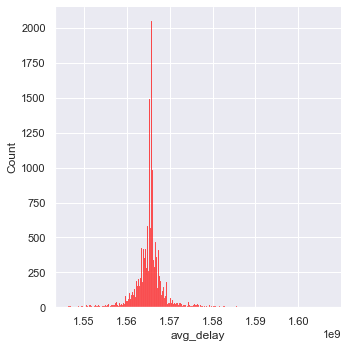

In [106]:
sns.displot(y_train.avg_delay,color="Red")

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [107]:
nc_di_groupby= pd.DataFrame(maindata.groupby('name_customer')['doc_id'].mean(numeric_only=False))
nc_di_groupby

doc_id
name_customer                     
11078 us              2.960539e+09
17135 associates      2.960588e+09
17135 llc             2.960609e+09
236008 associates     2.960594e+09
99 CE                 1.930455e+09
...                            ...
YEN BROS corp         2.960616e+09
YEN BROS corporation  2.960573e+09
YEN BROS llc          2.960579e+09
ZARCO co              2.960548e+09
ZIYAD  us             1.991825e+09

[3889 rows x 1 columns]

### You can make another distribution plot of the "doc_id" column from x_train

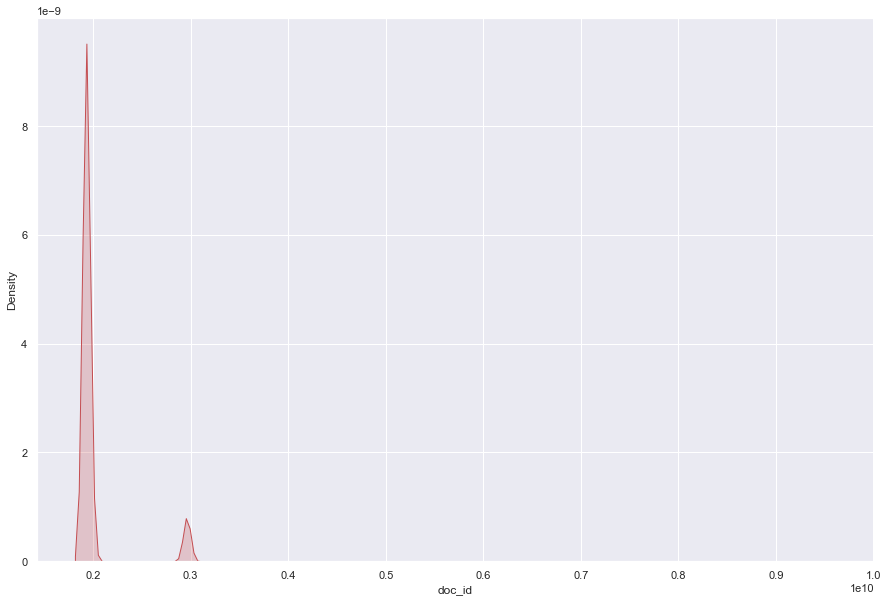

In [110]:
sns.set(rc={"figure.figsize": (15, 10)}); np.random.seed(0)
ax = sns.kdeplot(X_train.doc_id, shade=True, color="r")
plt.show()

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


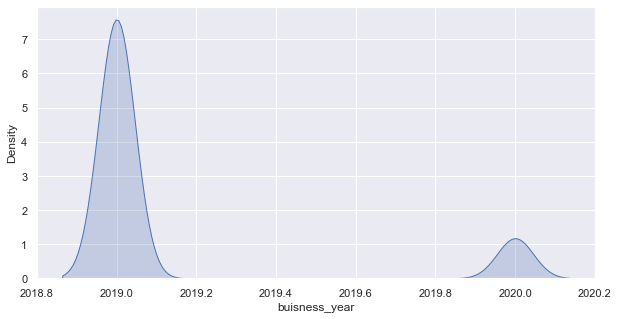

In [111]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
ax = sns.kdeplot(X_train.buisness_year, shade=True, color="b")
plt.show()

<AxesSubplot:xlabel='buisness_year', ylabel='doc_id'>

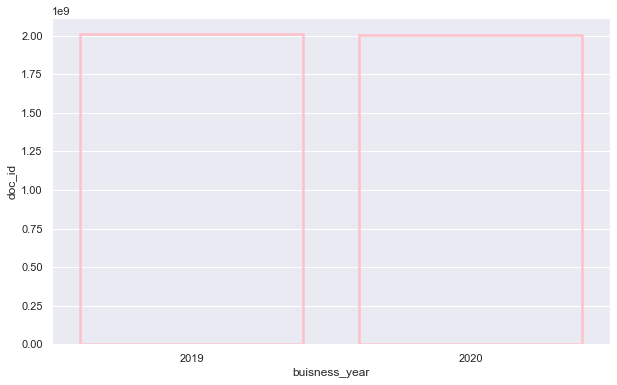

In [114]:
temp = pd.DataFrame(X_train.groupby(['buisness_year'], axis=0, as_index=False)['doc_id'].mean())
plt.figure(figsize=(10,6))
sns.barplot(x="buisness_year", y="doc_id",data=temp,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".8", edgecolor="Pink")

# Feature Engineering 

### Display and describe the X_train dataframe 

In [115]:
 X_train.head()

business_code cust_number       name_customer  buisness_year  \
44556          U001   200756072         REINHA corp           2019   
36713          U001   200776463          KROGE corp           2020   
2639           U001   200794332        COST systems           2019   
49682          U001   200780383     MEIJ foundation           2020   
45201          U001   200769623  WAL-MAR foundation           2019   

           doc_id posting_date                   due_in_date  \
44556  1929516074   2019-06-20 1970-01-01 00:00:00.020190705   
36713  1930432030   2020-01-23 1970-01-01 00:00:00.020200207   
2639   1928699109   2019-01-30 1970-01-01 00:00:00.020190214   
49682  1930340825   2019-12-31 1970-01-01 00:00:00.020200115   
45201  1929880806   2019-09-17 1970-01-01 00:00:00.020191002   

               baseline_create_date cust_payment_terms  converted_usd  
44556 1970-01-01 00:00:00.020190620               NAA8       54315.10  
36713 1970-01-01 00:00:00.020200123               NAA8       52725.92  
2639  1970-01-01 00:00:00.020190130               NAAX       21126.47  
49682 1970-01-01 00:00:00.020191231               NAA8      143649.72  
45201 1970-01-01 00:00:00.020190917               NAH4       14864.00

In [116]:
 X_train.describe()

buisness_year        doc_id  converted_usd
count   23494.000000  2.349400e+04   23494.000000
mean     2019.134077  2.011913e+09   30618.192289
std         0.340742  2.852458e+08   36500.609654
min      2019.000000  1.928502e+09       0.790000
25%      2019.000000  1.929174e+09    4569.665750
50%      2019.000000  1.929732e+09   16795.265000
75%      2019.000000  1.930209e+09   45472.520500
max      2020.000000  9.500000e+09  668593.360000

#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [117]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit_transform(X_train['business_code'])

array([1, 1, 1, ..., 1, 1, 1])

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [118]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [119]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [120]:
X_train["business_code_enc"]

44556    1
36713    1
2639     1
49682    1
45201    1
        ..
7745     5
14076    1
48693    1
1054     1
19783    1
Name: business_code_enc, Length: 23494, dtype: int32

#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [121]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [122]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [123]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [124]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [125]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [126]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [127]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [128]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [129]:
X_train.dtypes

cust_number                        int32
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [130]:
X_test.dtypes

cust_number                        int32
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [131]:
X_val.dtypes

cust_number                        int32
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [132]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [133]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [134]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [135]:
X_train,X_val,X_test = custom(["baseline_create_date"])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [136]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [137]:
X_train,X_val,X_test = custom(["due_in_date"])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [138]:
X_train.shape

(23494, 16)

In [139]:
X_val.shape

(19579, 16)

In [140]:
X_test.shape

(19579, 16)

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [141]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

10

- Note - Keep the code as it is, no need to change 


In [142]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

6


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [143]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

4


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [144]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [145]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

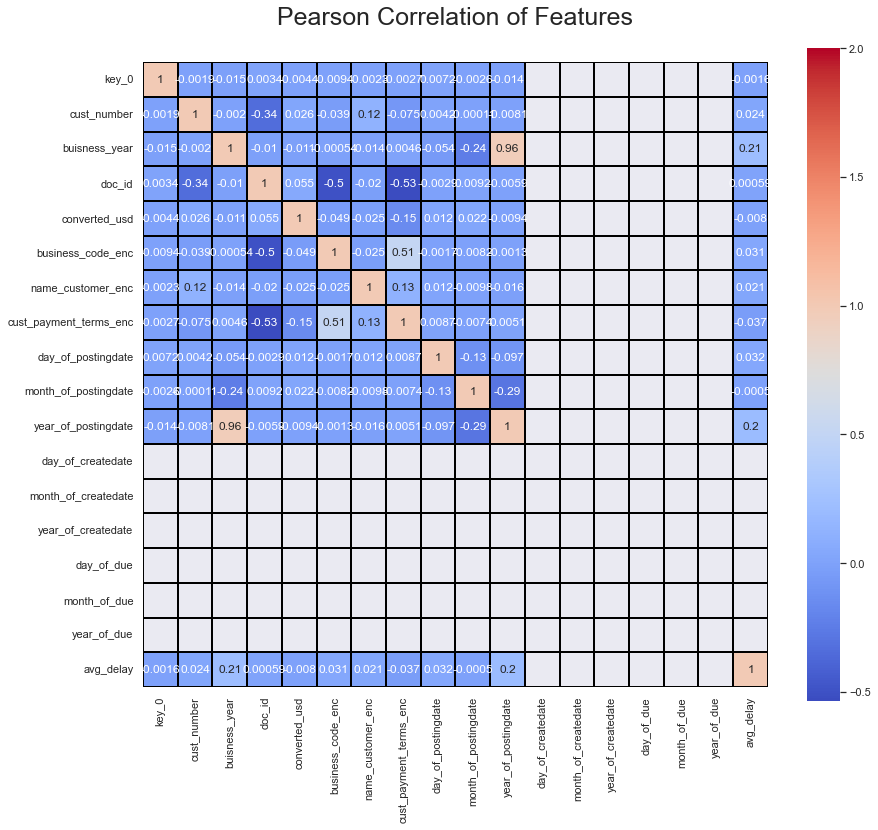

In [187]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=25)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.2,vmax=2.0, 
            square=True, cmap='coolwarm', linecolor='black', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [188]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [189]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 1.33223780e+09,
       2.80596482e-01, 1.05187609e+06, 1.23314110e+02, 8.21936797e+01,
       1.19704656e+01, 1.16288980e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [200]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [201]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [202]:
print(predicted.dtype)


float64


### Check the same for the Validation set also 

In [203]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3789994.0529931784

### Display The Comparison Lists

In [204]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[],[],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [205]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [206]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [207]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3906553.024469086

### Display The Comparison Lists

In [208]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[14636900896860.018],[-0.0011510021261738057],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [209]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [214]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [215]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

8.188153211231419e-07

### Display The Comparison Lists

In [213]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[14636900896860.018, 16037790984442.555],[-0.0011510021261738057, -0.09697063805421058],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [216]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[14636900896860.018, 16037790984442.555, 16037790984442.555],[-0.0011510021261738057, -0.09697063805421058, -0.09697063805421058],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [217]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [218]:
import sys
!{sys.executable} -m pip install xgboost

In [219]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [220]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2360555.446571124

### Display The Comparison Lists


In [221]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')
print("Accuracy= ", regressor.score(X_val,y_val))

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'XGB Regressor'],[14636900896860.018, 16037790984442.555, 16037790984442.555, 9372782348643.098],[-0.0011510021261738057, -0.09697063805421058, -0.09697063805421058, 0.3589100242478541],Accuracy=  0.634460095885305


## You need to make the comparison list into a comparison dataframe 

In [222]:
comaprison_dataframe = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [223]:
print(comaprison_dataframe)

               Algorithm     MSE_Score  R2_Score
0       LinearRegression  1.463690e+13 -0.001151
1                    SVR  1.603779e+13 -0.096971
2  DecisionTreeRegressor  1.603779e+13 -0.096971
3          XGB Regressor  9.372782e+12  0.358910


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [224]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [225]:
mean_squared_error(y_test,predictedfinal,squared=False)

3061500.016110256

### Calculate the mean Square Error for validation dataset

In [226]:
print("Mean squared error =", round(sm.mean_squared_error(y_val, predicted), 2))

Mean squared error = 19787412363253.42


### Calculate the R2 score for test

In [227]:
print("R2 score =", round(sm.r2_score(y_test, predicted), 2))

R2 score = 0.36


### Calculate the R2 score for Validation

In [228]:
print("R2 score =", round(sm.r2_score(y_val, predicted), 2))

R2 score = -0.3


### Calculate the Accuracy for train Dataset 

In [229]:
print("Accuracy= ", regressor.score(X_val,y_val))

Accuracy=  0.634460095885305


### Calculate the accuracy for validation

In [230]:
print("Accuracy= ", regressor.score(X_val,y_val))

Accuracy=  0.634460095885305


### Calculate the accuracy for test

In [231]:
print("Accuracy= ", regressor.score(X_test,y_test))

Accuracy=  0.3589100242478541


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [232]:
nulldata

business_code cust_number     name_customer clear_date  buisness_year  \
3              CA02   140105686          SYSC llc        NaT           2020   
7              U001   200744019           TARG us        NaT           2020   
10             U001   200418007               AM         NaT           2020   
14             U001   200739534        OK systems        NaT           2020   
15             U001   200353024  DECA corporation        NaT           2020   
...             ...         ...               ...        ...            ...   
50094          CA02   140106408        WAL-M corp        NaT           2020   
50095          CA02   140106408        WAL-M corp        NaT           2020   
50096          CA02   140106408        WAL-M corp        NaT           2020   
50097          CA02   140106408        WAL-M corp        NaT           2020   
50098          CA02   140106408        WAL-M corp        NaT           2020   

           doc_id posting_date                   due_in_date  \
3      2960623488   2020-03-30 1970-01-01 00:00:00.020200410   
7      1930659387   2020-03-19 1970-01-01 00:00:00.020200403   
10     1930610806   2020-11-03 1970-01-01 00:00:00.020200326   
14     1930788296   2020-04-15 1970-01-01 00:00:00.020200430   
15     1930817482   2020-04-23 1970-01-01 00:00:00.020200426   
...           ...          ...                           ...   
50094  2960618884   2020-06-03 1970-01-01 00:00:00.020200316   
50095  2960618885   2020-06-03 1970-01-01 00:00:00.020200316   
50096  2960618886   2020-06-03 1970-01-01 00:00:00.020200316   
50097  2960618887   2020-06-03 1970-01-01 00:00:00.020200316   
50098  2960618888   2020-06-03 1970-01-01 00:00:00.020200316   

               baseline_create_date cust_payment_terms  converted_usd  
3     1970-01-01 00:00:00.020200331               CA10       2309.790  
7     1970-01-01 00:00:00.020200319               NAA8      11173.020  
10    1970-01-01 00:00:00.020200311               NAA8       3525.590  
14    1970-01-01 00:00:00.020200415               NAA8     121105.650  
15    1970-01-01 00:00:00.020200416               NAM2       3726.060  
...                             ...                ...            ...  
50094 1970-01-01 00:00:00.020200306               CA10      64982.589  
50095 1970-01-01 00:00:00.020200306               CA10      64982.589  
50096 1970-01-01 00:00:00.020200306               CA10      64982.589  
50097 1970-01-01 00:00:00.020200306               CA10      64982.589  
50098 1970-01-01 00:00:00.020200306               CA10      64982.589  

[9779 rows x 11 columns]

### Check for the number of rows and columns in the nulldata

In [233]:
nulldata.shape

(9779, 11)

### Check the Description and Information of the nulldata 

In [234]:
nulldata.describe()

buisness_year        doc_id  converted_usd
count         9779.0  9.779000e+03    9779.000000
mean          2020.0  2.015730e+09   32395.557081
std              0.0  2.824983e+08   35393.870859
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930660e+09    5731.950000
50%           2020.0  1.930732e+09   19403.930000
75%           2020.0  1.930821e+09   48806.640000
max           2020.0  2.960636e+09  653644.800000

### Storing the Nulldata into a different dataset 
# for BACKUP

In [235]:
nulldata1 = pd.DataFrame(nulldata)

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [236]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [237]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [238]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [239]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [240]:
nulldata.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'business_code_enc', 'day_of_cleardate', 'month_of_cleardate',
       'year_of_cleardate', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [241]:
nulldata.drop(['business_code', "baseline_create_date", "due_in_date", "posting_date", "name_customer", "clear_date", "cust_payment_terms", 'day_of_cleardate', "month_of_cleardate", "year_of_cleardate"], axis = 1, inplace = True)

### Check the information of the "nulldata" dataframe

In [242]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int16  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [243]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int16  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int32  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

In [244]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 44405 to 45636
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             19579 non-null  int32  
 1   buisness_year           19579 non-null  int16  
 2   doc_id                  19579 non-null  int64  
 3   converted_usd           19579 non-null  float64
 4   business_code_enc       19579 non-null  int32  
 5   name_customer_enc       19579 non-null  int32  
 6   cust_payment_terms_enc  19579 non-null  int32  
 7   day_of_postingdate      19579 non-null  int64  
 8   month_of_postingdate    19579 non-null  int64  
 9   year_of_postingdate     19579 non-null  int64  
 10  day_of_createdate       19579 non-null  int64  
 11  month_of_createdate     19579 non-null  int64  
 12  year_of_createdate      19579 non-null  int64  
 13  day_of_due              19579 non-null  int64  
 14  month_of_due            19579 non-

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [245]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [246]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [247]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [248]:
nulldata

cust_number  buisness_year      doc_id  converted_usd  \
3        140105686           2020  2960623488       2309.790   
7        200744019           2020  1930659387      11173.020   
10       200418007           2020  1930610806       3525.590   
14       200739534           2020  1930788296     121105.650   
15       200353024           2020  1930817482       3726.060   
...            ...            ...         ...            ...   
50094    140106408           2020  2960618884      64982.589   
50095    140106408           2020  2960618885      64982.589   
50096    140106408           2020  2960618886      64982.589   
50097    140106408           2020  2960618887      64982.589   
50098    140106408           2020  2960618888      64982.589   

       business_code_enc  day_of_postingdate  month_of_postingdate  \
3                     65                  30                     3   
7                     65                  19                     3   
10                    65                   3                    11   
14                    65                  15                     4   
15                    65                  23                     4   
...                  ...                 ...                   ...   
50094                 65                   3                     6   
50095                 65                   3                     6   
50096                 65                   3                     6   
50097                 65                   3                     6   
50098                 65                   3                     6   

       year_of_postingdate  day_of_due  month_of_due  year_of_due  \
3                     2020           1             1         1970   
7                     2020           1             1         1970   
10                    2020           1             1         1970   
14                    2020           1             1         1970   
15                    2020           1             1         1970   
...                    ...         ...           ...          ...   
50094                 2020           1             1         1970   
50095                 2020           1             1         1970   
50096                 2020           1             1         1970   
50097                 2020           1             1         1970   
50098                 2020           1             1         1970   

       day_of_createdate  month_of_createdate  year_of_createdate  \
3                      1                    1                1970   
7                      1                    1                1970   
10                     1                    1                1970   
14                     1                    1                1970   
15                     1                    1                1970   
...                  ...                  ...                 ...   
50094                  1                    1                1970   
50095                  1                    1                1970   
50096                  1                    1                1970   
50097                  1                    1                1970   
50098                  1                    1                1970   

       cust_payment_terms_enc  name_customer_enc  
3                           5               2694  
7                          21               2777  
10                         21                 96  
14                         21               2008  
15                         36                729  
...                       ...                ...  
50094                       5               2965  
50095                       5               2965  
50096                       5               2965  
50097                       5               2965  
50098                       5               2965  

[9779 rows x 16 columns]

### Now you can pass this dataset into you final model and store it into "final_result"

In [249]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [250]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [251]:
final_result

0       1.564235e+09
1       1.566644e+09
2       1.566838e+09
3       1.564708e+09
4       1.568218e+09
            ...     
9774    1.564573e+09
9775    1.564573e+09
9776    1.564573e+09
9777    1.564573e+09
9778    1.564573e+09
Name: avg_delay, Length: 9779, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [252]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [253]:
Final

key_0 business_code  cust_number     name_customer clear_date  \
0         3          CA02    140105686          SYSC llc        NaT   
1         7          U001    200744019           TARG us        NaT   
2        10          U001    200418007               AM         NaT   
3        14          U001    200739534        OK systems        NaT   
4        15          U001    200353024  DECA corporation        NaT   
...     ...           ...          ...               ...        ...   
9774  50094          CA02    140106408        WAL-M corp        NaT   
9775  50095          CA02    140106408        WAL-M corp        NaT   
9776  50096          CA02    140106408        WAL-M corp        NaT   
9777  50097          CA02    140106408        WAL-M corp        NaT   
9778  50098          CA02    140106408        WAL-M corp        NaT   

      buisness_year      doc_id posting_date                   due_in_date  \
0              2020  2960623488   2020-03-30 1970-01-01 00:00:00.020200410   
1              2020  1930659387   2020-03-19 1970-01-01 00:00:00.020200403   
2              2020  1930610806   2020-11-03 1970-01-01 00:00:00.020200326   
3              2020  1930788296   2020-04-15 1970-01-01 00:00:00.020200430   
4              2020  1930817482   2020-04-23 1970-01-01 00:00:00.020200426   
...             ...         ...          ...                           ...   
9774           2020  2960618884   2020-06-03 1970-01-01 00:00:00.020200316   
9775           2020  2960618885   2020-06-03 1970-01-01 00:00:00.020200316   
9776           2020  2960618886   2020-06-03 1970-01-01 00:00:00.020200316   
9777           2020  2960618887   2020-06-03 1970-01-01 00:00:00.020200316   
9778           2020  2960618888   2020-06-03 1970-01-01 00:00:00.020200316   

              baseline_create_date  ... year_of_postingdate  day_of_due  \
0    1970-01-01 00:00:00.020200331  ...                2020           1   
1    1970-01-01 00:00:00.020200319  ...                2020           1   
2    1970-01-01 00:00:00.020200311  ...                2020           1   
3    1970-01-01 00:00:00.020200415  ...                2020           1   
4    1970-01-01 00:00:00.020200416  ...                2020           1   
...                            ...  ...                 ...         ...   
9774 1970-01-01 00:00:00.020200306  ...                2020           1   
9775 1970-01-01 00:00:00.020200306  ...                2020           1   
9776 1970-01-01 00:00:00.020200306  ...                2020           1   
9777 1970-01-01 00:00:00.020200306  ...                2020           1   
9778 1970-01-01 00:00:00.020200306  ...                2020           1   

      month_of_due  year_of_due  day_of_createdate  month_of_createdate  \
0                1         1970                  1                    1   
1                1         1970                  1                    1   
2                1         1970                  1                    1   
3                1         1970                  1                    1   
4                1         1970                  1                    1   
...            ...          ...                ...                  ...   
9774             1         1970                  1                    1   
9775             1         1970                  1                    1   
9776             1         1970                  1                    1   
9777             1         1970                  1                    1   
9778             1         1970                  1                    1   

      year_of_createdate  cust_payment_terms_enc  name_customer_enc  \
0                   1970                       5               2694   
1                   1970                      21               2777   
2                   1970                      21                 96   
3                   1970                      21               2008   
4                   1970                      36           

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [254]:
Final.shape

(9779, 28)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [255]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [256]:
Final.clear_date

0      2019-07-27 13:47:44.020200410
1      2019-08-24 10:57:04.020200403
2      2019-08-26 16:51:12.020200326
3      2019-08-02 01:04:00.020200430
4      2019-09-11 16:14:56.020200426
                    ...             
9774   2019-07-31 11:33:20.020200316
9775   2019-07-31 11:33:20.020200316
9776   2019-07-31 11:33:20.020200316
9777   2019-07-31 11:33:20.020200316
9778   2019-07-31 11:33:20.020200316
Name: clear_date, Length: 9779, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [257]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [258]:
Final.avg_delay

0       18104.0
1       18132.0
2       18134.0
3       18110.0
4       18150.0
         ...   
9774    18108.0
9775    18108.0
9776    18108.0
9777    18108.0
9778    18108.0
Name: avg_delay, Length: 9779, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [259]:

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [260]:
Final.drop(['key_0','avg_delay'],inplace = True, axis =1)

### Display the count of each categoty of new "Aging Bucket" column 

In [261]:
Final['Aging Bucket'].value_counts()

0-15               0
16-30              0
31-45              0
46-60              0
Greatar than 60    0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [262]:
Final

business_code  cust_number     name_customer  \
0             CA02    140105686          SYSC llc   
1             U001    200744019           TARG us   
2             U001    200418007               AM    
3             U001    200739534        OK systems   
4             U001    200353024  DECA corporation   
...            ...          ...               ...   
9774          CA02    140106408        WAL-M corp   
9775          CA02    140106408        WAL-M corp   
9776          CA02    140106408        WAL-M corp   
9777          CA02    140106408        WAL-M corp   
9778          CA02    140106408        WAL-M corp   

                        clear_date  buisness_year      doc_id posting_date  \
0    2019-07-27 13:47:44.020200410           2020  2960623488   2020-03-30   
1    2019-08-24 10:57:04.020200403           2020  1930659387   2020-03-19   
2    2019-08-26 16:51:12.020200326           2020  1930610806   2020-11-03   
3    2019-08-02 01:04:00.020200430           2020  1930788296   2020-04-15   
4    2019-09-11 16:14:56.020200426           2020  1930817482   2020-04-23   
...                            ...            ...         ...          ...   
9774 2019-07-31 11:33:20.020200316           2020  2960618884   2020-06-03   
9775 2019-07-31 11:33:20.020200316           2020  2960618885   2020-06-03   
9776 2019-07-31 11:33:20.020200316           2020  2960618886   2020-06-03   
9777 2019-07-31 11:33:20.020200316           2020  2960618887   2020-06-03   
9778 2019-07-31 11:33:20.020200316           2020  2960618888   2020-06-03   

                       due_in_date          baseline_create_date  \
0    1970-01-01 00:00:00.020200410 1970-01-01 00:00:00.020200331   
1    1970-01-01 00:00:00.020200403 1970-01-01 00:00:00.020200319   
2    1970-01-01 00:00:00.020200326 1970-01-01 00:00:00.020200311   
3    1970-01-01 00:00:00.020200430 1970-01-01 00:00:00.020200415   
4    1970-01-01 00:00:00.020200426 1970-01-01 00:00:00.020200416   
...                            ...                           ...   
9774 1970-01-01 00:00:00.020200316 1970-01-01 00:00:00.020200306   
9775 1970-01-01 00:00:00.020200316 1970-01-01 00:00:00.020200306   
9776 1970-01-01 00:00:00.020200316 1970-01-01 00:00:00.020200306   
9777 1970-01-01 00:00:00.020200316 1970-01-01 00:00:00.020200306   
9778 1970-01-01 00:00:00.020200316 1970-01-01 00:00:00.020200306   

     cust_payment_terms  ...  year_of_postingdate  day_of_due  month_of_due  \
0                  CA10  ...                 2020           1             1   
1                  NAA8  ...                 2020           1             1   
2                  NAA8  ...                 2020           1             1   
3                  NAA8  ...                 2020           1             1   
4                  NAM2  ...                 2020           1             1   
...                 ...  ...                  ...         ...           ...   
9774               CA10  ...                 2020           1             1   
9775               CA10  ...                 2020           1             1   
9776               CA10  ...                 2020           1             1   
9777               CA10  ...                 2020           1             1   
9778               CA10  ...                 2020           1             1   

      year_of_due  day_of_createdate  month_of_createdate  year_of_createdate  \
0            1970                  1                    1                1970   
1            1970                  1                    1                1970   
2            1970                  1                    1                1970   
3            1970                  1                    1                1970   
4            1970                  1                    1                1970   
...           ...                ...                  ...                 ...   
9774         1970                  1                    1                1970   
9775         1970

### Store this dataframe into the .csv format

In [264]:
Final.to_csv('HRC71251W_Archana.csv')

# END OF THE PROJECT